# Домашнее задание по статистическому анализу на python

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [89]:
df=pd.read_csv('world-happiness-report-2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [90]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [135]:
df=df.dropna(subset=['Freedom'])

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

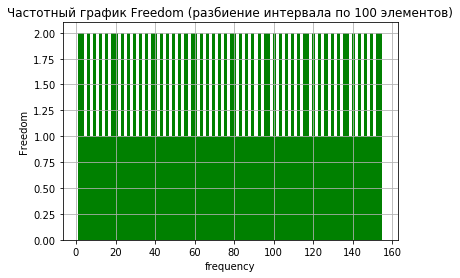

In [136]:
plt.hist(df['Freedom'], 100, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Частотный график freedom показывает, что распределение равномерное 

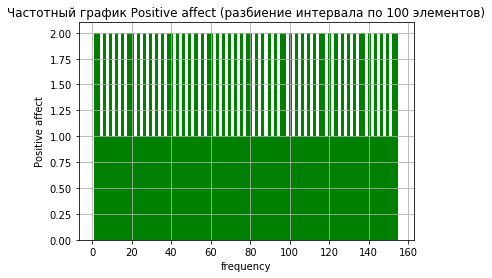

In [137]:
plt.hist(df['Positive affect'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Частотный график positive effect показывает, что распределение равномерное 

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [138]:
statistics.mean(df['Freedom'])

78.0

In [139]:
#Медиана
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  78.0


In [140]:
duration=df['Freedom']
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [141]:
min(duration)

1.0

In [142]:
max(duration)

155.0

In [143]:
#Выбросы
df['Freedom'].isnull().sum()

0

In [144]:
#Стандартное отклонение
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

44.88875137492688


In [145]:
#Дисперсия
statistics.pvariance(duration)

2002.0

In [146]:
#Размах
duration_range = max(duration) - min(duration)
print(duration_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656


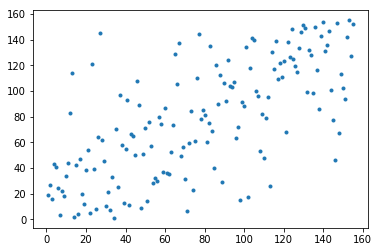

In [147]:
from scipy.stats import pearsonr
x = df['Freedom']
y = df['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [148]:
Freedom = df['Freedom']
print(statistics.mean(Freedom))
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))
min(Freedom_1)
max(Freedom_1)

78.0
0.0


77.0

In [149]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1, 1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[1.]


In [150]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить матрицу корреляций для всех колонок таблицы

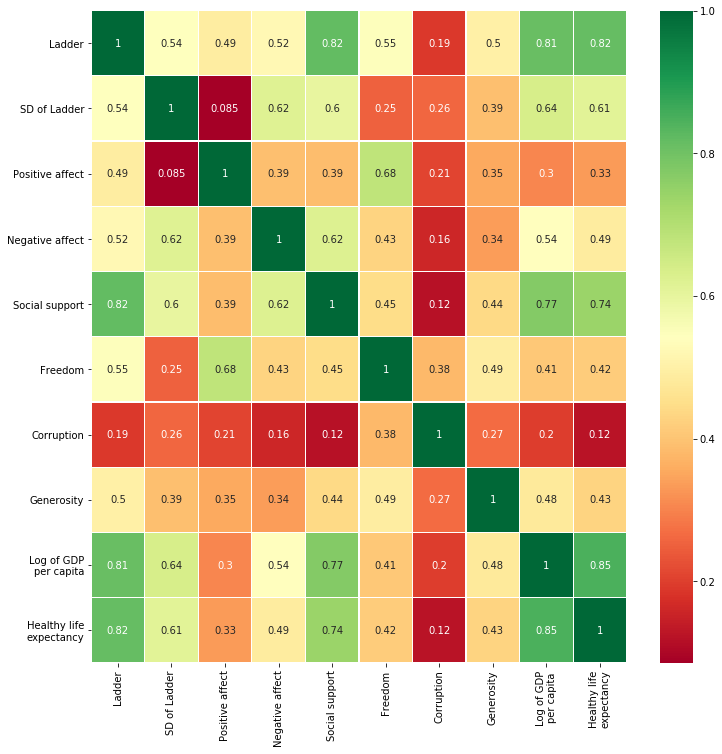

In [151]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


Загрузить следующую таблицу: 

In [152]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df1=pd.read_csv(url)
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

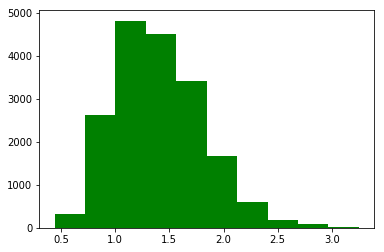

In [153]:
plt.hist(df1['AveragePrice'], 10, facecolor='g')

Частотный график колонки AveragePrice показывает, что распредлеение нормальное. 

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

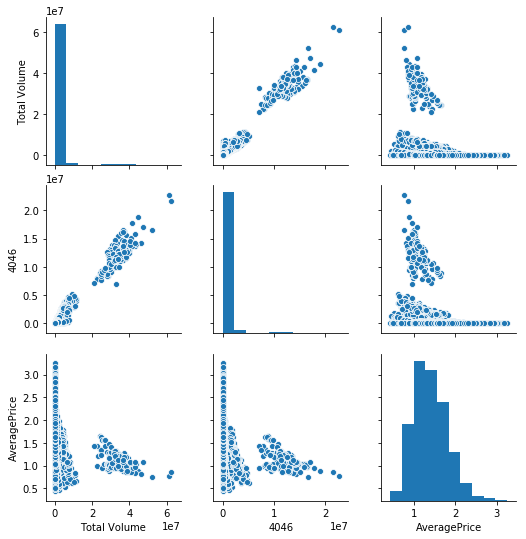

In [154]:
sns_plot = sns.pairplot(
    df1[['Total Volume', '4046', 'AveragePrice']])
sns_plot

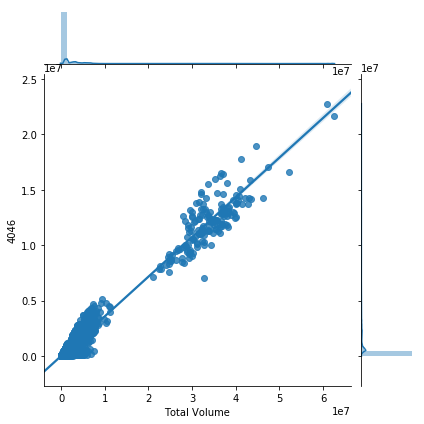

In [155]:
sns.jointplot(x='Total Volume', y='4046', 
              data=df1, kind='reg')